<a href="https://colab.research.google.com/github/Developper85/Multi-Classification-with-Artificial-Neural-Networks-using-Keras/blob/feature%2FANN-binary-classification/ANN_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks with Keras

<p color='green'><b>Import libraries we will work with</b></p>

In [7]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
tf.__version__

'2.12.0'

<b>Building an Image Classifier</b>

<p align='justify'>An image classifier is a type of machine learning algorithm or model that is trained to recognize and categorize images into one or more predefined classes or categories. The classifier works by learning to identify patterns and features within images that are characteristic of each class.
</p>


<p align='justify'>Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:</p>

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

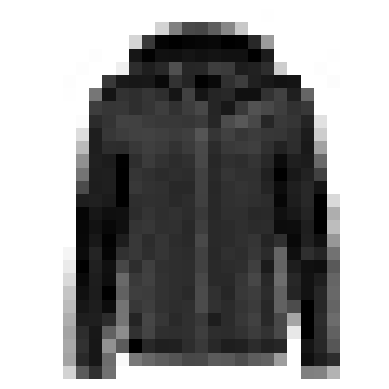

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

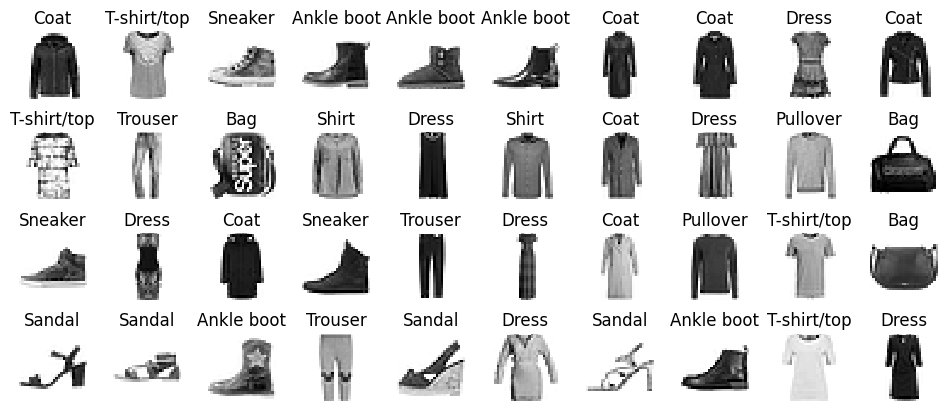

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
        
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<b> Construct a Model</b>

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Supprimer toutes les sessions précédentes et les modèles stockés en mémoire

In [ ]:
keras.backend.clear_session()
np.random.seed(42)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[-0.0511785 ,  0.03908903,  0.05767895, ..., -0.05468889,
         0.03833963,  0.05358866],
       [-0.06907257,  0.05460034, -0.04960485, ...,  0.02444179,
        -0.03466917, -0.0107796 ],
       [-0.0010548 , -0.02434421, -0.02535837, ...,  0.04947458,
        -0.02050773, -0.06015614],
       ...,
       [-0.05230838,  0.06899489,  0.02892102, ..., -0.06837884,
         0.06600067, -0.06551813],
       [ 0.05557822,  0.02941786, -0.07254154, ..., -0.03775619,
        -0.06841242, -0.0334029 ],
       [ 0.05587834, -0.04720745,  0.03423575, ..., -0.04021354,
         0.02751168,  0.05655076]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

<b>Compile the Model</b>


Configuration : Here you can chose the loss function, the optimizer, the performance metric, etc. 

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

<b>Train the model</b>

Here you can chose how many epochs you need and the batch size.

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7367 - accuracy: 0.7585 - val_loss: 0.5569 - val_accuracy: 0.8096
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4977 - accuracy: 0.8275 - val_loss: 0.4506 - val_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4493 - accuracy: 0.8432 - val_loss: 0.4291 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4217 - accuracy: 0.8520 - val_loss: 0.3973 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4018 - accuracy: 0.8594 - val_loss: 0.3792 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3857 - accuracy: 0.8634 - val_loss: 0.3806 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3722 - accuracy: 0.8693 - val_loss: 0.3723 - val_accuracy

KeyboardInterrupt: ignored

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<b> Plot learning Curves</b>

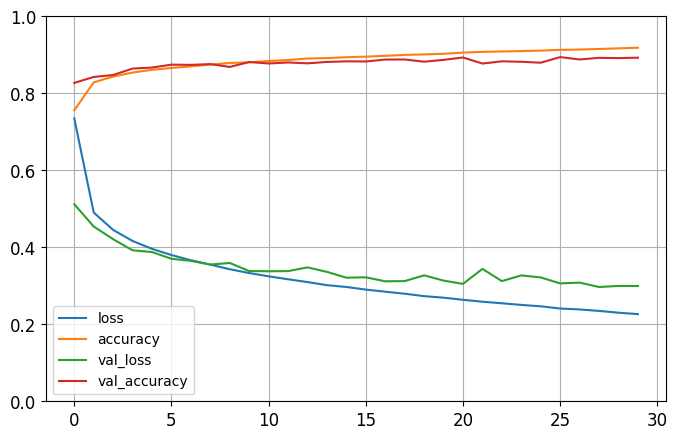

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

> <b> Accuracy</b>

<p align="justify">The plot shows that the accuracy of the model on the training set increases steadily over the epochs, while the accuracy on the validation set also increases initially but then reaches a plateau and does not improve much after that. This indicates that the model is starting to overfit to the training set.
</p>


> <b>Loss</b>

<p align="justify">The plot shows that the loss of the model on the training set decreases steadily over the epochs, while the loss on the validation set also decreases initially but then reaches a plateau and does not improve much after that. This confirms that the model is overfitting to the training set.
</p>




In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8811


[0.33208954334259033, 0.8810999989509583]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 397ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred_prob = model.predict(X_new)
y_pred = y_pred_prob.argmax(axis=-1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

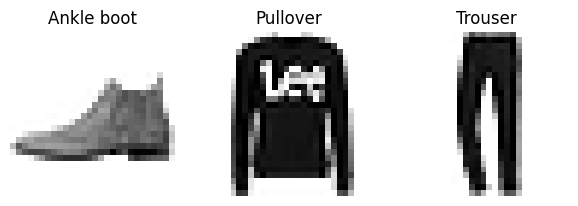

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

<b>1. Plot Learning Curves using different optimizers</b>

<font color="Red"><b> 1.1. Adam optimizer</b></font>

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 6ms/step - loss: 0.3728 - accuracy: 0.8653 - val_loss: 0.3548 - val_accuracy: 0.8740
Epoch 2/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3279 - accuracy: 0.8782 - val_loss: 0.3406 - val_accuracy: 0.8742
Epoch 3/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3099 - accuracy: 0.8854 - val_loss: 0.3534 - val_accuracy: 0.8726
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2914 - accuracy: 0.8913 - val_loss: 0.3152 - val_accuracy: 0.8838
Epoch 5/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2720 - accuracy: 0.8987 - val_loss: 0.3223 - val_accuracy: 0.8826
Epoch 6/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2614 - accuracy: 0.9016 - val_loss: 0.3224 - val_accuracy: 0.8818
Epoch 7/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2515 - accuracy: 0.9058 - val_loss: 0.3167 - val_a

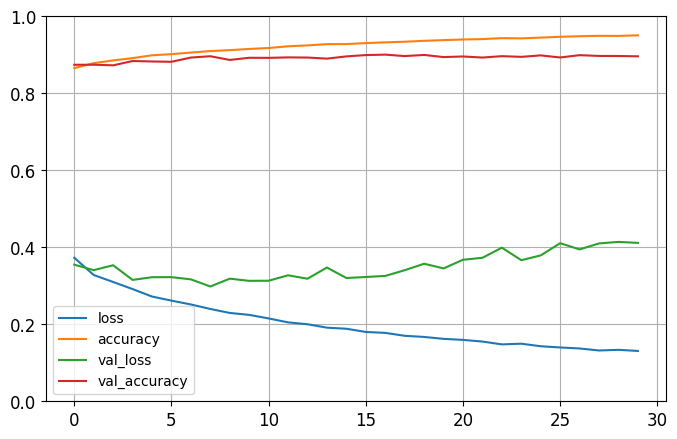

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

> <b> Analysis</b>

The plot shows that the loss of validation set increase, and that is not good, It indicates an overfitting.

<font color="Red"><b> 1.2. Adagrad optimizer</b></font>

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adagrad",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0966 - accuracy: 0.9636 - val_loss: 0.3955 - val_accuracy: 0.9030
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0883 - accuracy: 0.9667 - val_loss: 0.3966 - val_accuracy: 0.9040
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0851 - accuracy: 0.9681 - val_loss: 0.3972 - val_accuracy: 0.9046
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0832 - accuracy: 0.9691 - val_loss: 0.3980 - val_accuracy: 0.9054
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0819 - accuracy: 0.9697 - val_loss: 0.3997 - val_accuracy: 0.9048
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0809 - accuracy: 0.9698 - val_loss: 0.4000 - val_accuracy: 0.9042
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0801 - accuracy: 0.9702 - val_loss: 0.4012 - val_accuracy

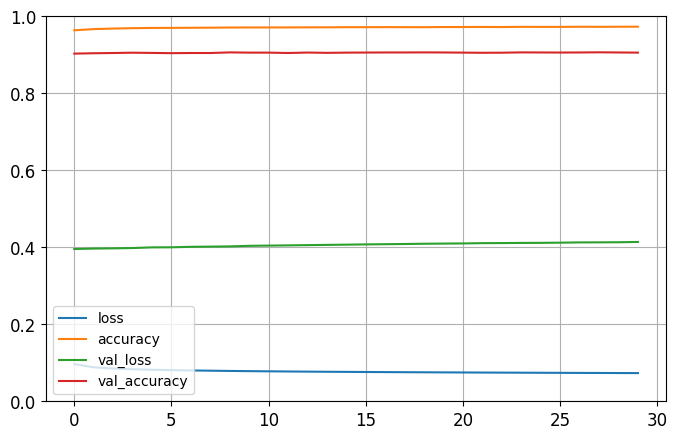

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<font color="Red"><b> 1.3. Adamax optimizer</b></font>

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adagrad",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0733 - accuracy: 0.9731 - val_loss: 0.4148 - val_accuracy: 0.9054
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0729 - accuracy: 0.9729 - val_loss: 0.4155 - val_accuracy: 0.9046
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0726 - accuracy: 0.9732 - val_loss: 0.4162 - val_accuracy: 0.9066
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0723 - accuracy: 0.9731 - val_loss: 0.4168 - val_accuracy: 0.9050
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0720 - accuracy: 0.9734 - val_loss: 0.4166 - val_accuracy: 0.9058
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0718 - accuracy: 0.9736 - val_loss: 0.4175 - val_accuracy: 0.9056
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0715 - accuracy: 0.9736 - val_loss: 0.4188 - val_accurac

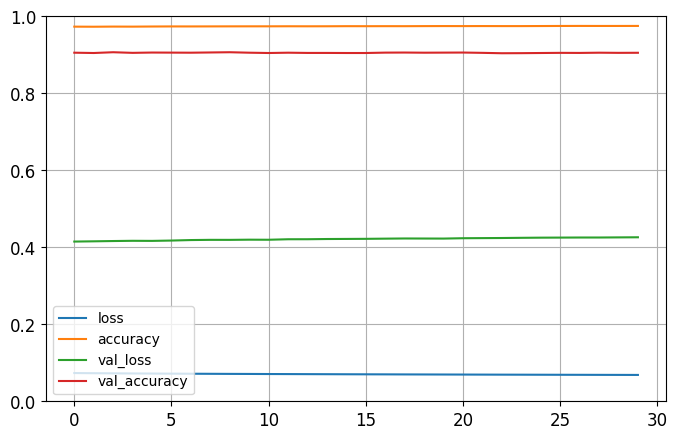

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<b>2. Plot Learning Curves using different batch size</b>

<font color="Red"><b> 2.1. batch size = 64</b></font>

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 8s 9ms/step - loss: 0.3516 - accuracy: 0.8759 - val_loss: 0.3625 - val_accuracy: 0.8758
Epoch 2/30
860/860 [==============================] - 5s 6ms/step - loss: 0.3459 - accuracy: 0.8788 - val_loss: 0.3566 - val_accuracy: 0.8744
Epoch 3/30
860/860 [==============================] - 4s 5ms/step - loss: 0.3396 - accuracy: 0.8805 - val_loss: 0.3536 - val_accuracy: 0.8780
Epoch 4/30
860/860 [==============================] - 6s 7ms/step - loss: 0.3348 - accuracy: 0.8811 - val_loss: 0.3559 - val_accuracy: 0.8760
Epoch 5/30
860/860 [==============================] - 6s 7ms/step - loss: 0.3297 - accuracy: 0.8823 - val_loss: 0.3530 - val_accuracy: 0.8740
Epoch 6/30
860/860 [==============================] - 7s 8ms/step - loss: 0.3253 - accuracy: 0.8852 - val_loss: 0.3450 - val_accuracy: 0.8782
Epoch 7/30
860/860 [==============================] - 4s 5ms/step - loss: 0.3209 - accuracy: 0.8852 - val_loss: 0.3344 - val_accuracy: 0.8834
Epoch 

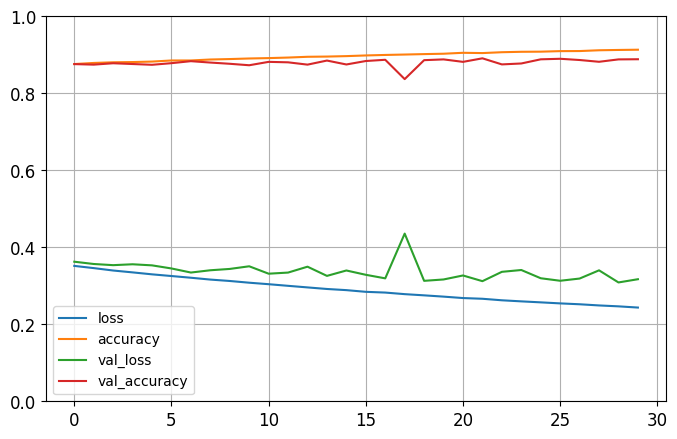

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<font color="Red"><b> 2.2. batch size = 256</b></font>

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
215/215 [==============================] - 2s 11ms/step - loss: 0.2305 - accuracy: 0.9186 - val_loss: 0.3001 - val_accuracy: 0.8940
Epoch 2/30
215/215 [==============================] - 4s 17ms/step - loss: 0.2289 - accuracy: 0.9205 - val_loss: 0.2976 - val_accuracy: 0.8934
Epoch 3/30
215/215 [==============================] - 2s 10ms/step - loss: 0.2283 - accuracy: 0.9197 - val_loss: 0.2943 - val_accuracy: 0.8946
Epoch 4/30
215/215 [==============================] - 2s 10ms/step - loss: 0.2275 - accuracy: 0.9200 - val_loss: 0.2967 - val_accuracy: 0.8918
Epoch 5/30
215/215 [==============================] - 2s 10ms/step - loss: 0.2258 - accuracy: 0.9216 - val_loss: 0.3021 - val_accuracy: 0.8912
Epoch 6/30
215/215 [==============================] - 3s 14ms/step - loss: 0.2260 - accuracy: 0.9206 - val_loss: 0.2990 - val_accuracy: 0.8930
Epoch 7/30
215/215 [==============================] - 4s 19ms/step - loss: 0.2248 - accuracy: 0.9215 - val_loss: 0.2945 - val_accuracy: 0.8940

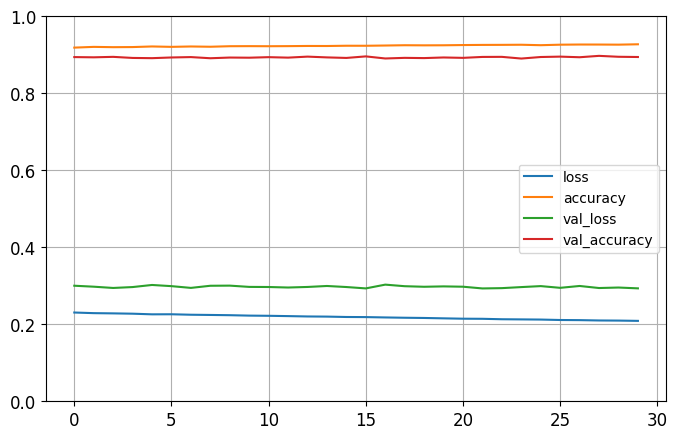

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<b>3. Plot Learning curves when using different number of epochs</b>

<font color="Red"><b> 3.1. epochs = 15</b></font>

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2423 - accuracy: 0.9123 - val_loss: 0.3093 - val_accuracy: 0.8900
Epoch 2/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2371 - accuracy: 0.9142 - val_loss: 0.3160 - val_accuracy: 0.8854
Epoch 3/15
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2324 - accuracy: 0.9163 - val_loss: 0.4234 - val_accuracy: 0.8558
Epoch 4/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2294 - accuracy: 0.9166 - val_loss: 0.3133 - val_accuracy: 0.8868
Epoch 5/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2237 - accuracy: 0.9193 - val_loss: 0.3090 - val_accuracy: 0.8902
Epoch 6/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2183 - accuracy: 0.9208 - val_loss: 0.3282 - val_accuracy: 0.8826
Epoch 7/15
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2160 - accuracy: 0.9224 - val_loss: 0.3066 - val_accura

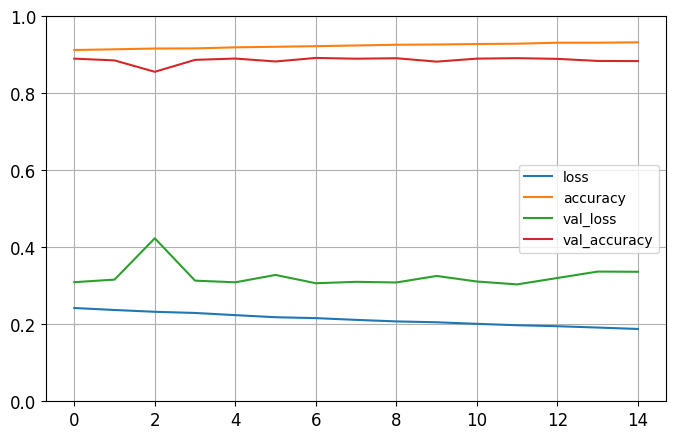

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<font color="Red"><b> 3.2. epochs = 64</b></font>

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=64,
                    validation_data=(X_valid, y_valid))

Epoch 1/64
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1858 - accuracy: 0.9334 - val_loss: 0.2949 - val_accuracy: 0.8944
Epoch 2/64
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1819 - accuracy: 0.9346 - val_loss: 0.2949 - val_accuracy: 0.8980
Epoch 3/64
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1790 - accuracy: 0.9363 - val_loss: 0.3016 - val_accuracy: 0.8908
Epoch 4/64
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1766 - accuracy: 0.9369 - val_loss: 0.2932 - val_accuracy: 0.8974
Epoch 5/64
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1752 - accuracy: 0.9375 - val_loss: 0.3199 - val_accuracy: 0.8880
Epoch 6/64
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1710 - accuracy: 0.9386 - val_loss: 0.3012 - val_accuracy: 0.8934
Epoch 7/64
1719/1719 [==============================] - 13s 7ms/step - loss: 0.1698 - accuracy: 0.9396 - val_loss: 0.3254 - val_accuracy

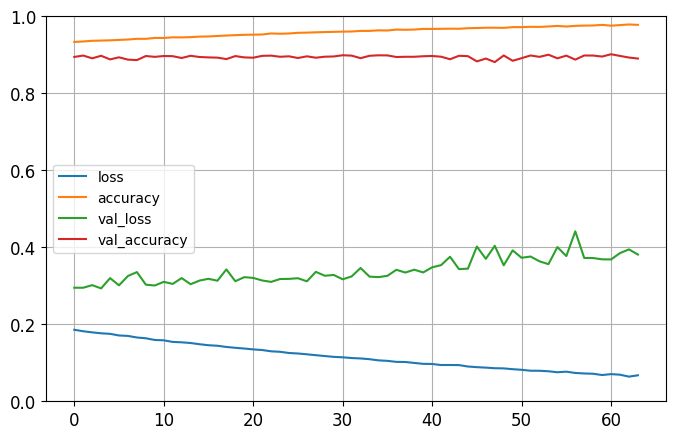

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<b>4. Add additional neurons and use Dropout Layer. Plot Learning curves.</b>

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dropout(0.2)) 
model.add(keras.layers.Dense(200, activation="relu")) 
model.add(keras.layers.Dropout(0.2)) 
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7978 - accuracy: 0.7297 - val_loss: 0.5311 - val_accuracy: 0.8194
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5371 - accuracy: 0.8135 - val_loss: 0.4453 - val_accuracy: 0.8458
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4792 - accuracy: 0.8321 - val_loss: 0.4136 - val_accuracy: 0.8578
Epoch 4/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4448 - accuracy: 0.8427 - val_loss: 0.3889 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4207 - accuracy: 0.8504 - val_loss: 0.3835 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4006 - accuracy: 0.8570 - val_loss: 0.3619 - val_accuracy: 0.8752
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3847 - accuracy: 0.8626 - val_loss: 0.3572 - val_ac

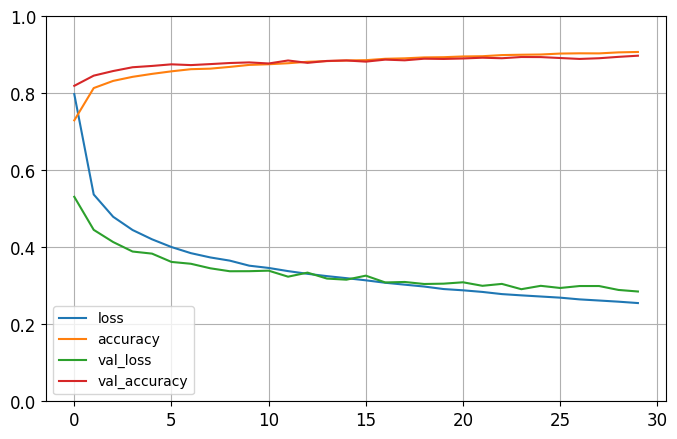

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<b>5. Use Batch Normalisation</b>

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5348 - accuracy: 0.8140 - val_loss: 0.3835 - val_accuracy: 0.8654
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3946 - accuracy: 0.8589 - val_loss: 0.3451 - val_accuracy: 0.8780
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3539 - accuracy: 0.8721 - val_loss: 0.3304 - val_accuracy: 0.8814
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3248 - accuracy: 0.8824 - val_loss: 0.3295 - val_accuracy: 0.8828
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3039 - accuracy: 0.8899 - val_loss: 0.3179 - val_accuracy: 0.8848
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2886 - accuracy: 0.8955 - val_loss: 0.3137 - val_accuracy: 0.8886
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2729 - accuracy: 0.9012 - val_loss: 0.3146 - val_ac

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<b>6. Repeat with more layers</b>

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(300))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(200))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(100))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<b> 7. Apply on different datasets</b>

<font color="Red"><b> IMDB dataset</b></font>

In [9]:
from keras.datasets import imdb
(X_train_full, y_train_full), (X_test, y_test) = imdb.load_data(num_words=10000)

In [10]:
X_train_full , X_train_full.shape 

(array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
        list([1, 194, 1153, 194, 8255, 78, 22

In [12]:
X_test , X_test.shape

(array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
        list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7

Scale IMDB dataset:

In [24]:
"""import numpy as np
k=0
for row in X_train_full:
  X_train_full[k] = np.array(row) / 10000
  k+=1

k=0
for row in y_train_full:
  y_train_full[k] = np.array(row) / 10000
  k+=1

k=0
for row in X_test:
  X_test[k] = np.array(row) / 10000
  k+=1


k=0
for row in y_test:
  y_test[k] = np.array(row) / 10000
  k+=1
"""

Construct train/ validation sets

In [25]:
X_valid, X_train = X_train_full[:5000] , X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Construct 